In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')

In [70]:
df = pd.read_csv('./datasets/covid_19_data.csv')

In [71]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [72]:
df.columns


Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [73]:
df.loc[df['Country/Region'] == 'Argentina']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3273,3274,03/03/2020,NaN,Argentina,2020-03-03T17:43:02,1.0,0.0,0.0
3434,3435,03/04/2020,NaN,Argentina,2020-03-04T01:33:07,1.0,0.0,0.0
3607,3608,03/05/2020,NaN,Argentina,2020-03-04T01:33:07,1.0,0.0,0.0
3772,3773,03/06/2020,NaN,Argentina,2020-03-06T01:29:39,2.0,0.0,0.0
3949,3950,03/07/2020,NaN,Argentina,2020-03-07T02:13:09,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302610,302611,05/25/2021,NaN,Argentina,2021-05-26 04:20:35,3586736.0,75056.0,3157660.0
303375,303376,05/26/2021,NaN,Argentina,2021-05-27 04:20:59,3622135.0,75588.0,3181288.0
304140,304141,05/27/2021,NaN,Argentina,2021-05-28 04:20:36,3663215.0,76135.0,3219474.0
304905,304906,05/28/2021,NaN,Argentina,2021-05-29 04:20:41,3702422.0,76693.0,3252843.0


In [74]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [75]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [76]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [77]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [78]:
df = df[[
        'ObservationDate',
        'Country/Region',
        'Confirmed',
        'Deaths',
        'Recovered'
        ]]

In [79]:
df = df.rename(columns={'Country/Region': 'Country'})

In [80]:
df.sample(5)

,ObservationDate,Country,Confirmed,Deaths,Recovered
295259,2021-05-15,Belgium,118527.0,0.0,0.0
211757,2021-01-26,Russia,19031.0,135.0,17211.0
165562,2020-11-26,Spain,95296.0,2452.0,16160.0
199667,2021-01-10,US,757045.0,11458.0,0.0
11700,2020-04-03,Mainland China,489.0,13.0,469.0


In [81]:
time_df_with_country = df.groupby(['Country', 'ObservationDate']).sum()
time_df_with_country

Confirmed  Deaths  Recovered
Country                        ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [82]:
df_time = df.groupby(['ObservationDate']).sum()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [83]:
df_example1 = df_time['Confirmed'].iloc[20:25]
df_example1

ObservationDate
2020-02-11    44803.0
2020-02-12    45222.0
2020-02-13    60370.0
2020-02-14    66887.0
2020-02-15    69033.0
Name: Confirmed, dtype: float64

In [84]:
df_example2 = df_time['Deaths'].iloc[19:24]
df_example2

ObservationDate
2020-02-10    1013.0
2020-02-11    1113.0
2020-02-12    1118.0
2020-02-13    1371.0
2020-02-14    1523.0
Name: Deaths, dtype: float64

In [85]:
df_example1 - df_example2

ObservationDate
2020-02-10        NaN
2020-02-11    43690.0
2020-02-12    44104.0
2020-02-13    58999.0
2020-02-14    65364.0
2020-02-15        NaN
dtype: float64

In [86]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [87]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [88]:
# df_time.resample('3D').sum()
# df_time.resample('7D').sum()
df_time.resample('15D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,1.392140e+05,3008.0,4.273000e+03
2020-02-06,8.430240e+05,20883.0,1.189990e+05
2020-02-21,1.295063e+06,43216.0,5.558380e+05
2020-03-07,2.584241e+06,100537.0,1.106433e+06
2020-03-22,1.121203e+07,561010.0,2.439992e+06
2020-04-06,2.850835e+07,1848265.0,6.869512e+06
2020-04-21,4.671623e+07,3303684.0,1.405037e+07
2020-05-06,6.552103e+07,4471621.0,2.331400e+07
2020-05-21,8.760656e+07,5424447.0,3.637027e+07


In [89]:
df_time.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,6.150000e+03,175.0,227.0
2020-02-02,6.165500e+04,1351.0,1433.0
2020-02-09,2.138910e+05,4547.0,11982.0
2020-02-16,4.003040e+05,9574.0,48395.0
2020-02-23,5.346650e+05,15422.0,126410.0
...,...,...,...
2021-05-02,1.053199e+09,22149846.0,612974005.0
2021-05-09,1.092105e+09,22787017.0,646175776.0
2021-05-16,1.127756e+09,23404453.0,679456333.0


In [90]:
df_time.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [91]:
df_time.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,3.898000e+03,9.050000e+01,8.970000e+01
2020-02-29,5.765379e+04,1.617172e+03,1.313231e+04
2020-03-31,2.869707e+05,1.247119e+04,8.733332e+04
2020-04-30,2.105175e+06,1.400167e+05,5.474061e+05
2020-05-31,4.672833e+06,3.098703e+05,1.748977e+06
2020-06-30,8.226694e+06,4.431530e+05,3.955513e+06
2020-07-31,1.393427e+07,5.933232e+05,7.816248e+06
2020-08-31,2.168362e+07,7.707827e+05,1.365971e+07
2020-09-30,2.983799e+07,9.374629e+05,2.027766e+07


In [92]:
df_time.resample('12H').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,0.0,0.0,0.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [93]:
df_time.resample('12H').mean()
# df_time.resample('12H').mean().bfill()
# df_time.resample('12H').mean().ffill()
# df_time.resample('12H').mean().interpolate()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [98]:

df_time['ProbabilityOfDeath'] = df_time['Deaths'] / df_time['Confirmed']
df_time['SurvivalRate'] = 1 - df_time['ProbabilityOfDeath']

In [99]:
df_time


,Confirmed,Deaths,Recovered,ProbabilityOfDeath,SurvivalRate
ObservationDate,,,,,
2020-01-22,557.0,17.0,30.0,0.030521,0.969479
2020-01-23,1097.0,34.0,60.0,0.030994,0.969006
2020-01-24,941.0,26.0,39.0,0.027630,0.972370
2020-01-25,1437.0,42.0,42.0,0.029228,0.970772
2020-01-26,2118.0,56.0,56.0,0.026440,0.973560
...,...,...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0,0.020768,0.979232
2021-05-26,168416423.0,3498544.0,105380748.0,0.020773,0.979227
2021-05-27,168970791.0,3511297.0,106078106.0,0.020780,0.979220


In [100]:
df_time['SurvivalRate'].resample('M').mean()

ObservationDate
2020-01-31    0.973989
2020-02-29    0.973668
2020-03-31    0.960188
2020-04-30    0.935504
2020-05-31    0.933097
2020-06-30    0.945619
2020-07-31    0.957001
2020-08-31    0.964297
2020-09-30    0.968495
2020-10-31    0.972021
2020-11-30    0.975716
2020-12-31    0.977637
2021-01-31    0.978427
2021-02-28    0.977966
2021-03-31    0.977909
2021-04-30    0.978570
2021-05-31    0.979201
Freq: M, Name: SurvivalRate, dtype: float64

<AxesSubplot:xlabel='ObservationDate'>

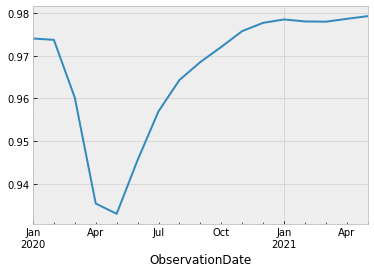

In [103]:
df_time['SurvivalRate'].resample('M').mean().plot()


In [111]:
df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)

Country
US                       6.049146e+09
India                    3.226768e+09
Brazil                   2.653588e+09
Russia                   9.305488e+08
France                   8.551890e+08
                             ...     
Cape Verde               1.000000e+00
The Gambia               1.000000e+00
Republic of the Congo    1.000000e+00
 Azerbaijan              1.000000e+00
China                    0.000000e+00
Name: Confirmed, Length: 229, dtype: float64

In [110]:
df.groupby('Country')['Confirmed'].max().sort_values(ascending=False)

Country
France                   5863138.0
India                    5713215.0
Turkey                   5235978.0
UK                       3910803.0
US                       3788713.0
                           ...    
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
China                          0.0
Name: Confirmed, Length: 229, dtype: float64

In [114]:
df_pais_cualquiera = time_df_with_country.loc[['China', 'US']]
df_pais_cualquiera

Confirmed    Deaths  Recovered
Country ObservationDate                                 
China   2020-01-22              0.0       0.0        0.0
        2020-01-23              0.0       0.0        0.0
        2020-01-24              0.0       0.0        0.0
        2020-01-25              0.0       0.0        0.0
        2020-01-26              0.0       0.0        0.0
...                             ...       ...        ...
US      2021-05-25       33166418.0  590941.0        0.0
        2021-05-26       33190470.0  591950.0        0.0
        2021-05-27       33217995.0  593288.0        0.0
        2021-05-28       33239963.0  593963.0        0.0
        2021-05-29       33251939.0  594306.0        0.0

[542 rows x 3 columns]